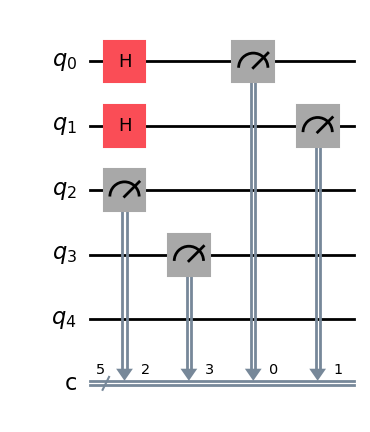

In [34]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate

hadamard_gate = HGate()

qc = QuantumCircuit(5, 5)
qc.append(hadamard_gate, [0])
qc.append(hadamard_gate, [1])
qc.measure(
    range(4), range(4)
)
qc.draw("mpl")

In [22]:
import numpy as np
from qiskit import QuantumCircuit
 
circuit = QuantumCircuit(1)
circuit.prepare_state([1/np.sqrt(2), -1/np.sqrt(2)], 0)
circuit.draw()


┌─────────────────────────────────────┐
q: ┤ State Preparation(0.70711,-0.70711) ├
   └─────────────────────────────────────┘

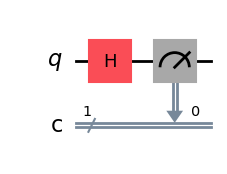

In [49]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate

hadamard_gate = HGate()

qc = QuantumCircuit(1, 1)
qc.append(hadamard_gate, [0])
qc.measure(
    range(1), range(1)
)
qc.draw("mpl")


In [28]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import (
    Collect2qBlocks,
    ConsolidateBlocks,
    UnitarySynthesis,
)
 
basis_gates = ["rx", "ry", "rxx"]
translate = PassManager(
    [
        Collect2qBlocks(),
        ConsolidateBlocks(basis_gates=basis_gates),
        UnitarySynthesis(basis_gates),
    ]
)

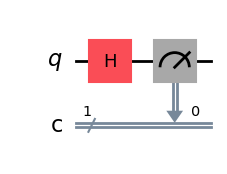

In [29]:
translated = translate.run(qc)
translated.draw("mpl")

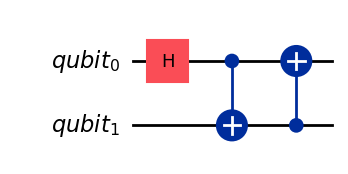

In [32]:
from qiskit import QuantumRegister, QuantumCircuit
 
qubits = QuantumRegister(2, name="qubit")
circuit = QuantumCircuit(qubits)
 
a, b = qubits
circuit.h(a)
circuit.cx(a, b)
circuit.cx(b, a)
 
circuit.draw("mpl")

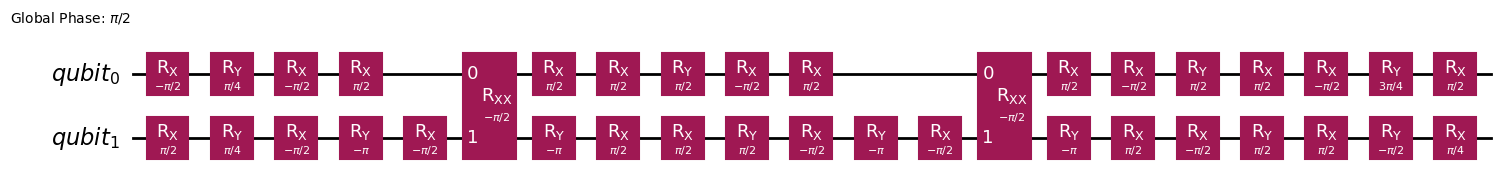

In [33]:
translated = translate.run(circuit)
translated.draw("mpl")

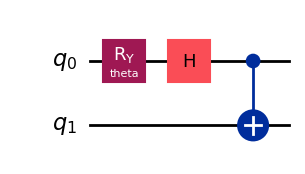

In [35]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
 
# circuit for which you want to obtain the expected value
circuit = QuantumCircuit(2)
circuit.ry(Parameter("theta"), 0)
circuit.h(0)
circuit.cx(0, 1)
circuit.draw("mpl", style="iqp")

In [42]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
 
# observable(s) whose expected values you want to compute
 
observable = SparsePauliOp(["II", "XX", "YY", "ZZ"], coeffs=[1, 1, -1, 1])
 
# value(s) for the circuit parameter(s)
parameter_values = [[0], [np.pi / 6], [np.pi / 2]]

In [43]:
# Generate a pass manager without providing a backend
from qiskit.transpiler import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=1)
isa_circuit = pm.run(qc)
isa_observable = observable.apply_layout(isa_circuit.layout)

In [44]:
from qiskit.primitives import StatevectorEstimator
 
estimator = StatevectorEstimator()

In [45]:
job = estimator.run([(qc, observable, parameter_values)])
result = job.result()
print(f" > Result class: {type(result)}")

ValueError: Length of () inconsistent with last dimension of [[0.        ]
 [0.52359878]
 [1.57079633]]

In [40]:
print(f" > Expectation value: {result[0].data.evs}")
print(f" > Metadata: {result[0].metadata}")

 > Expectation value: [4.         3.73205081 2.        ]
 > Metadata: {'target_precision': 0.0, 'circuit_metadata': {}}


In [53]:
from qiskit.circuit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

 
# Run the sampler job locally using FakeManilaV2
fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)
isa_qc = pm.run(qc)
 
# You can use a fixed seed to get fixed results.
options = {"simulator": {"seed_simulator": 42}}
sampler = Sampler(mode=fake_manila, options=options)
 
result = sampler.run([isa_qc]).result()
print(result)

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=1>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


AttributeError: 'DataBin' object has no attribute 'evs'